In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf, keras
from word2number import w2n
import math

2024-08-13 23:41:56.598115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 23:41:56.621125: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 23:41:56.628132: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 23:41:58.298381: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
 1   math    10 non-null     int64 
 2   cs      10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.shape

(10, 3)

In [5]:
x = df[['math']]
x

,math
0,92
1,56
2,88
3,70
4,80
5,49
6,65
7,35
8,66
9,67


In [6]:
x = np.array(x)
x

array([[92],
       [56],
       [88],
       [70],
       [80],
       [49],
       [65],
       [35],
       [66],
       [67]])

In [7]:
y = df[['cs']]
y

,cs
0,98
1,68
2,81
3,80
4,83
5,52
6,66
7,30
8,68
9,73


In [8]:
y = np.array(y)
y

array([[98],
       [68],
       [81],
       [80],
       [83],
       [52],
       [66],
       [30],
       [68],
       [73]])

<div style="width:100%; height:auto; display:flex; flex-direction:row; justify-content:space-between;">
<img style="width:30%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/03_Gradient_Descent_and_Cost_Function/cost_mse_equation.png">
<img style="width:30%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/03_Gradient_Descent_and_Cost_Function/partial_derivatives_m_b.png">
<img style="width:30%;height:auto" src="/home/ahmedunix/data_Science_Work/Machine_Learning/03_Gradient_Descent_and_Cost_Function/learning_rate_formulas.png">
</div>

In [31]:
def gradient_descent(x,y,learning_rate):
    m_curr = b_curr = 0
    n = len(x)
    plt.scatter(x,y,color='red', marker='+', linewidth=5)
    cost_mse_prev = float('inf')

    while True:
        y_predicted = m_curr * x + b_curr
        cost_mse_curr = (1/n) * np.sum((y-y_predicted) ** 2)

        cost_mse_curr_scalar = float(cost_mse_curr)
        cost_mse_prev_scalar = float(cost_mse_prev)

        if math.isclose(cost_mse_curr_scalar, cost_mse_prev_scalar, rel_tol=1e-20):
            break
        
        cost_mse_prev = cost_mse_curr_scalar
        m_partial_deriv = -(2/n) * np.sum(x * (y - y_predicted))
        b_partial_deriv = -(2/n) * np.sum(y - y_predicted)
        m_curr = m_curr - learning_rate * m_partial_deriv
        b_curr = b_curr - learning_rate * b_partial_deriv
        print(f"m current:{m_curr}, b current:{b_curr}, cost_mse:{cost_mse_curr_scalar}")
        plt.plot(x,y_predicted, color='green')

m current:3.9567200000000007, b current:0.055920000000000004, cost_mse:5199.1
m current:-7.074438348800003, b current:-0.09965185280000005, cost_mse:40195.53029384067
m current:23.679919960789, b current:0.3344058540421121, cost_mse:312211.8633848424
m current:-62.06182356355112, b current:-0.8753965933456861, cost_mse:2426509.9451161283
m current:176.98221583027814, b current:2.497807575165163, cost_mse:18860289.223655052
m current:-489.4615947989681, b current:-6.906200284865035, cost_mse:146594927.82898548
m current:1368.5531443669079, b current:19.312072301419718, cost_mse:1139436417.487269
m current:-3811.5066411232337, b current:-53.782937391389, cost_mse:8856483526.630877
m current:10630.262190312875, b current:150.00292386014974, cost_mse:68838682805.2264
m current:-29632.726213091133, b current:-418.1423699292585, cost_mse:535061601936.32495
m current:82618.6367493766, b current:1165.820952794275, cost_mse:4158866879791.2925
m current:-230333.00909957982, b current:-3250.19573

/tmp/ipykernel_168343/2757621380.py:9: RuntimeWarning: overflow encountered in square
  cost_mse_curr = (1/n) * np.sum((y-y_predicted) ** 2)


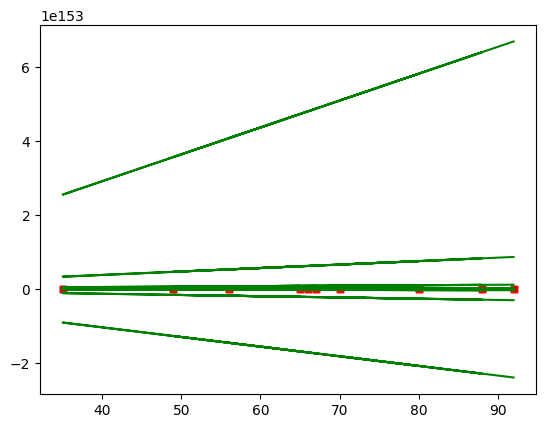

In [32]:
gradient_descent(x, y, learning_rate=0.0004)

In [14]:
model = linear_model.LinearRegression()
model

LinearRegression()

In [16]:
trained_model = model.fit(x,y)
trained_model

LinearRegression()

In [17]:
trained_model.coef_

array([[1.01773624]])

In [18]:
trained_model.intercept_

array([1.91521931])